This script explores a geosat data and does image processing to 
1) segment into respective bands
2) Compute the spatial shifts between the bands
3)  

In [1]:
import sys
sys.path.append('./utils/')
import os
from utils import io
from utils import image_processing as imp
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

%load_ext autoreload
%autoreload 2

dataFolder = Path(os.environ.get("GEOSATDATA_PATH"))
if not dataFolder:
    print(f"[ERROR]: Set the path to the data folder in the environment variables")


## File segmentation:
Read the tiff file and segment the array based on bands

In [2]:
dataPath = dataFolder.joinpath("image_003711.tiff") # visualize the first image
print(dataPath)
data = io.GeoFileData()
data.ReadFile(str(dataPath))

C:\Users\vivek\Documents\github\GeoSat-image-processing\data\Kaleideo IPS Dataset\image_003711.tiff


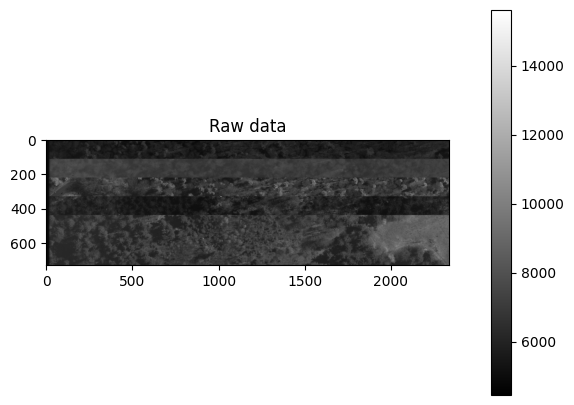

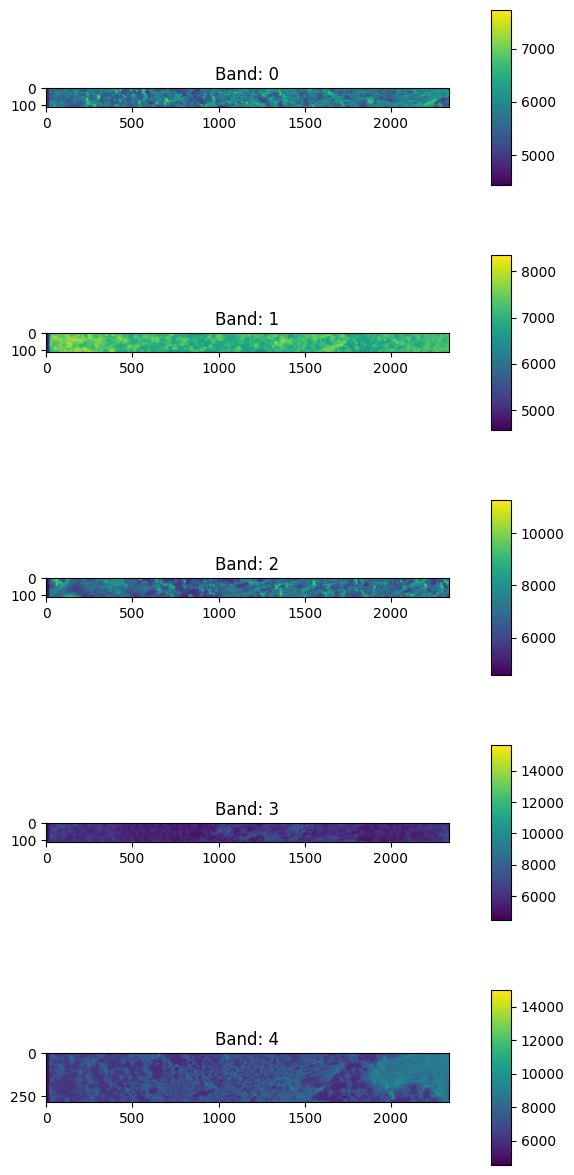

In [3]:
#Visualize the dataop0
data.DataPlainView()

## Registration of bands across multiple frames 
First lets visualize how the data looks across multiple frames

In [6]:
imgAlignStrategy = imp.ImageAlignmentStrategy(imp.PhaseCorrelation(), dataFolder) # set the strategy to align images
rawData = imgAlignStrategy.GetRawData(bandNumber = -1)
 

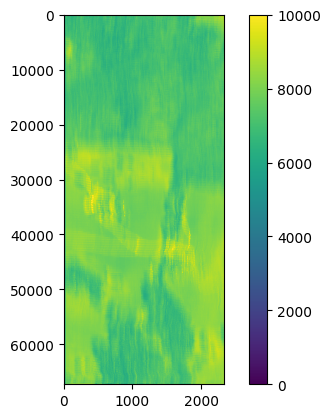

In [7]:
plt.figure()
plt.imshow((rawData), aspect= 0.08)
plt.clim([0,10000])
plt.colorbar()
plt.show()
